<h1 style='color: #C9C9C9'>Machine Learning with Python<img style="float: right; margin-top: 0;" width="240" src="../../Images/cf-logo.png" /></h1> 
<p style='color: #C9C9C9'>&copy; Coding Fury 2022 - all rights reserved</p>

<hr style='color: #C9C9C9' />

The example below uses data taken from
https://www.scribbr.com/statistics/multiple-linear-regression/



# Multiple Linear Regression

**Multiple Linear Regression** really refers to Linear Regression in multiple dimensions. In other words, you'll need Multiple Linear Regression when you have multiple input features, and one target variable. 

The aim is still to draw a line of best fit through our data points, but this time in multi-dimensional space. As we saw earlier, it's easy to plot data in 2 or 3 dimensions. 

Beyond that, we can't visualize the data, but the math still works!

![](../../Images/dimensions.png)

## Equation

The mathematical equation for **Simple Linear Regression** is: 

$$y = a_1x_1 + b$$

The mathematical equation for **Multiple Linear Regression** is: 

$$y = a_1x_1 + a_2x_2 + ... + a_nx_n + b$$


# Assumptions when using Linear Regression

1. Homogeneity of variance (homoscedasticity)
    * the size of the error in our prediction doesn't change significantly across the values of the input features.
    
2. Independence of observations: 
    * the observations in the dataset were collected using statistically valid methods, and there are no hidden relationships among variables.

    In multiple linear regression, it is possible that some of the independent variables are actually correlated with one another, so it is important to check these before developing the regression model. If two independent variables are too highly correlated ($r^2 > \sim0.6$), then only one of them should be used in the regression model.

## Heart Disease Data

> You are a public health researcher interested in social factors that influence heart disease.
>
>You survey 500 towns and gather data on the percentage of people in each town who smoke, the percentage of people in each town who bike to work, and the percentage of people in each town who have heart disease.
> 
> Because you have two features and one target variable, and all your variables are numerical, you can use multiple linear regression to analyze the relationship between them.

In [3]:
import pandas as pd
heart_disease_df = pd.read_csv('../../Data/heart_data.csv')
heart_disease_df


,biking,smoking,heart_disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224
...,...,...,...
493,47.660440,27.562464,11.294392
494,45.097203,21.385620,9.616762
495,8.279743,6.423720,13.495168
496,42.345863,20.741328,10.115865


### Plot Biking vs Heart Disease

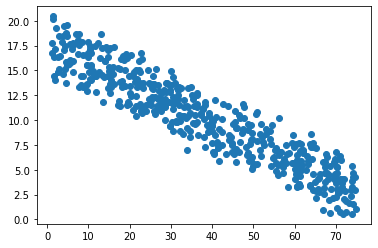

In [4]:
import matplotlib.pyplot as plt

plt.scatter(heart_disease_df['biking'], heart_disease_df['heart_disease'])

### Plot Smoking vs Heart Disease

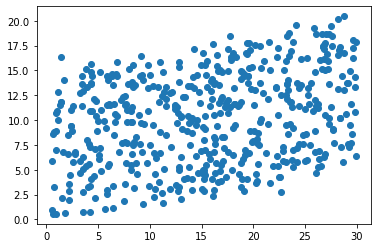

In [5]:
plt.scatter(heart_disease_df['smoking'], heart_disease_df['heart_disease'])

### Plot Biking and Smoking vs Heart Disease

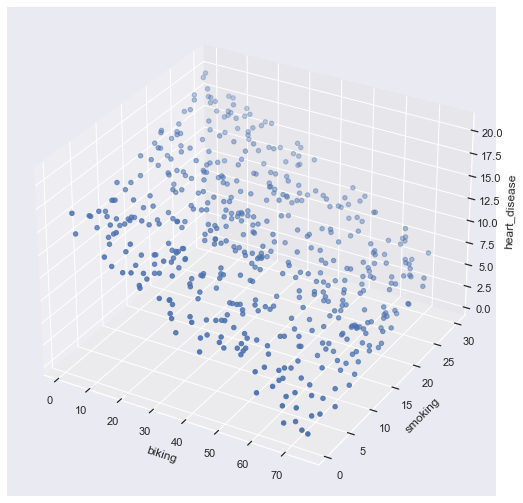

In [6]:
import seaborn as sns

sns.set(style = "darkgrid", rc={'figure.figsize':(9, 9)}) 


fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = heart_disease_df['biking']
y = heart_disease_df['smoking']
z = heart_disease_df['heart_disease']

ax.set_xlabel("biking")
ax.set_ylabel("smoking")
ax.set_zlabel("heart_disease")

ax.scatter(x, y, z)

plt.show()


# Train your Multiple Linear Regression Model

### Steps

Do you remember the four steps for machine learning with SciKit Learn? 

```
1. from sckitlearn.module import Model
2. model = Model()
3. model.fit(X,y)
4. predictions = model.predict(new_X) 
````
### Rules

Do you remember the rules of Machine Learning with SciKit Learn?

SciKit Learn requires:
1. numerical data
2. no missing data
3. a numpy array of data

Let's quickly test if our dataset meets these criteria

In [14]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   biking         498 non-null    float64
 1   smoking        498 non-null    float64
 2   heart_disease  498 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Split the data into Features (X) and Target (y)

In [8]:
heart_disease_df

,biking,smoking,heart_disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224
...,...,...,...
493,47.660440,27.562464,11.294392
494,45.097203,21.385620,9.616762
495,8.279743,6.423720,13.495168
496,42.345863,20.741328,10.115865


The Features are 'biking' and 'smoking'. The target value is 'heart_disease"

In [9]:
# Create X by getting the features i.e. all columns except the target
# get the data as a numpy array
X = heart_disease_df.drop("heart_disease", axis='columns').values

In [10]:
# Create y by getting the target value column
# get the data as a numpy array
y = heart_disease_df["heart_disease"].values

In [11]:
# Fit the model to the data
model.fit(X, y) # X = features; y = target


LinearRegression()

# Make predictions

Make predictions about the percentage of people with heart disease in towns where: 

1. 80% bike to work and 20% of people smoke
1. 50% bike to work and 50% of people smoke 
1. 20% bike to work and 80% of people smoke

In [12]:
import numpy as np
new_X = np.array([[80,20],[50,50],[20,80]], dtype = float)

In [13]:
predictions = model.predict(new_X)
predictions

array([ 2.54069211, 13.89470108, 25.24871006])